### Forecasting 30yr-Treasury-Bond prices with Facebook Prophet Model

In [1]:
# Install the required libraries
from IPython.display import clear_output
try:
  !pip install pystan~=2.14
  !pip install fbprophet
  !pip install hvplot
  !pip install holoviews
except:
  print("Error installing libraries")
finally:
  clear_output()
  print('Libraries successfully installed')

Libraries successfully installed


In [2]:
# Import the required libraries and dependencies
import pandas as pd
import hvplot.pandas
import datetime as dt
import holoviews as hv
from fbprophet import Prophet

%matplotlib inline

Output hidden; open in https://colab.research.google.com to view.

In [3]:
# Upload the top 25 sp500 stocks csv file 
from google.colab import files
uploaded = files.upload()

Saving 30yrTreasuryBond.csv to 30yrTreasuryBond.csv


In [4]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("30yrTreasuryBond.csv",
                 index_col="Date",
                 infer_datetime_format=True,
                 parse_dates=True
                )

# Drop columns that won't be used
df = df.drop(columns=["Open", "High", "Close", "Low", "Volume"] , axis=1)
df = df.dropna()

# Preview the dataset
df.head()

,Adj Close
Date,
2017-12-19,2.821
2017-12-20,2.876
2017-12-21,2.832
2017-12-22,2.833
2017-12-26,2.813


In [5]:
# Reset the index so that we recode the columns for Prophet
df.reset_index(inplace = True)

In [6]:
# Label the columns ds and y so that the syntax is recognized by Prophet
prophet_df = df.rename(columns = {'Date' : 'ds', 'Adj Close' : 'y'})

In [ ]:
prophet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      1258 non-null   datetime64[ns]
 1   y       1258 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.8 KB


In [7]:
# View dataframe shape, and the first and last five rows of the mercado_prophet_df DataFrame
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2017-12-19,2.821
1,2017-12-20,2.876
2,2017-12-21,2.832
3,2017-12-22,2.833
4,2017-12-26,2.813


,ds,y
1253,2022-12-12,3.576
1254,2022-12-13,3.528
1255,2022-12-14,3.539
1256,2022-12-15,3.496
1257,2022-12-16,3.533


In [8]:
# Sort the DataFrame by `ds` in ascending order
prophet_df = prophet_df.sort_values('ds', ascending = True)

# Display sample data from head and tail
display(prophet_df.head())
display(prophet_df.tail())

,ds,y
0,2017-12-19,2.821
1,2017-12-20,2.876
2,2017-12-21,2.832
3,2017-12-22,2.833
4,2017-12-26,2.813


,ds,y
1253,2022-12-12,3.576
1254,2022-12-13,3.528
1255,2022-12-14,3.539
1256,2022-12-15,3.496
1257,2022-12-16,3.533


In [9]:
# Call the Prophet function, store as an object
model_30yrbond = Prophet()

In [10]:
# Fit the Prophet model.
model_30yrbond.fit(prophet_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days)
future_trends = model_30yrbond.make_future_dataframe(periods = 30, freq = 'D')

# View the last five rows of the predictions
display(future_trends.head())
display(future_trends.tail())

,ds
0,2017-12-19
1,2017-12-20
2,2017-12-21
3,2017-12-22
4,2017-12-26


,ds
1283,2023-01-11
1284,2023-01-12
1285,2023-01-13
1286,2023-01-14
1287,2023-01-15


In [12]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends = model_30yrbond.predict(future_trends)

# Display the first five rows of the forecast DataFrame
display(forecast_trends.head())
display(forecast_trends.tail())

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-12-19,2.870690,2.623823,2.968682,2.870690,2.870690,-0.066858,-0.066858,-0.066858,0.018264,0.018264,0.018264,-0.085122,-0.085122,-0.085122,0.0,0.0,0.0,2.803831
1,2017-12-20,2.871919,2.633814,2.969395,2.871919,2.871919,-0.063139,-0.063139,-0.063139,0.014757,0.014757,0.014757,-0.077897,-0.077897,-0.077897,0.0,0.0,0.0,2.808780
2,2017-12-21,2.873149,2.635858,2.995890,2.873149,2.873149,-0.059053,-0.059053,-0.059053,0.011347,0.011347,0.011347,-0.070400,-0.070400,-0.070400,0.0,0.0,0.0,2.814096
3,2017-12-22,2.874378,2.646654,2.986709,2.874378,2.874378,-0.051667,-0.051667,-0.051667,0.011062,0.011062,0.011062,-0.062729,-0.062729,-0.062729,0.0,0.0,0.0,2.822711
4,2017-12-26,2.879297,2.688285,3.040969,2.879297,2.879297,-0.013945,-0.013945,-0.013945,0.018264,0.018264,0.018264,-0.032209,-0.032209,-0.032209,0.0,0.0,0.0,2.865352


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1283,2023-01-11,4.259805,4.129602,4.460524,4.256092,4.265272,0.031942,0.031942,0.031942,0.014757,0.014757,0.014757,0.017185,0.017185,0.017185,0.0,0.0,0.0,4.291748
1284,2023-01-12,4.265784,4.123815,4.456469,4.261330,4.272332,0.027237,0.027237,0.027237,0.011347,0.011347,0.011347,0.015890,0.015890,0.015890,0.0,0.0,0.0,4.293021
1285,2023-01-13,4.271763,4.118164,4.468077,4.266885,4.279266,0.025397,0.025397,0.025397,0.011062,0.011062,0.011062,0.014335,0.014335,0.014335,0.0,0.0,0.0,4.297160
1286,2023-01-14,4.277741,4.084351,4.432700,4.271761,4.285929,-0.023383,-0.023383,-0.023383,-0.035984,-0.035984,-0.035984,0.012601,0.012601,0.012601,0.0,0.0,0.0,4.254358
1287,2023-01-15,4.283720,4.082324,4.424981,4.276184,4.292843,-0.025213,-0.025213,-0.025213,-0.035984,-0.035984,-0.035984,0.010772,0.010772,0.010772,0.0,0.0,0.0,4.258507


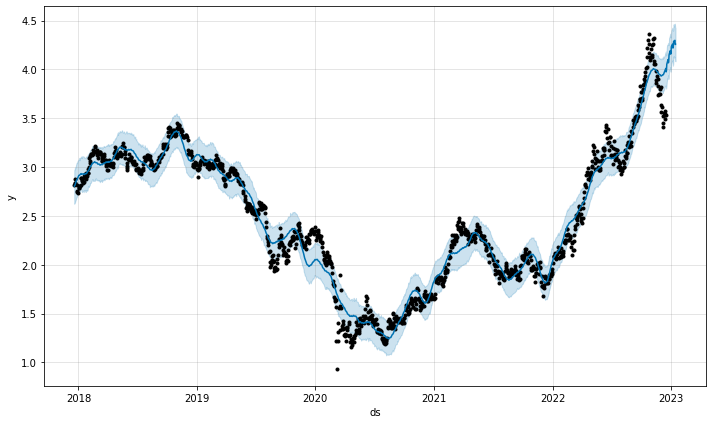

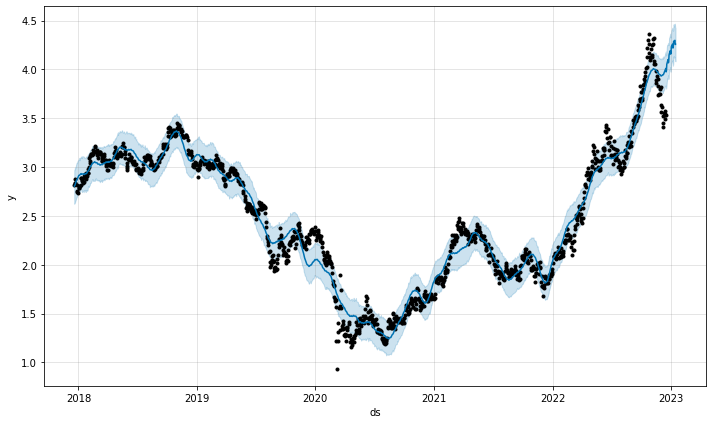

In [13]:
# Plot the Prophet predictions for the Mercado trends data
model_30yrbond.plot(forecast_trends)

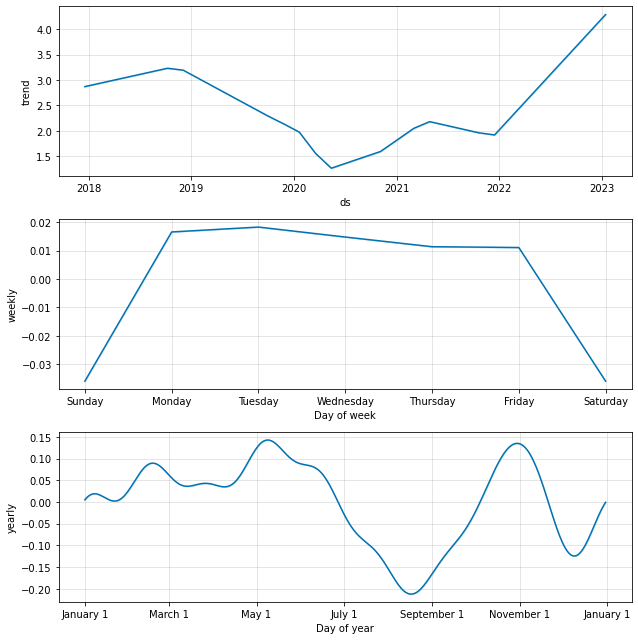

In [14]:
# Use the plot_components function to visualize the forecast results 
figures = model_30yrbond.plot_components(forecast_trends)

In [15]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends.set_index('ds', inplace = True)
forecast_trends.head()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,,,,,,,
2017-12-19,2.870690,2.623823,2.968682,2.870690,2.870690,-0.066858,-0.066858,-0.066858,0.018264,0.018264,0.018264,-0.085122,-0.085122,-0.085122,0.0,0.0,0.0,2.803831
2017-12-20,2.871919,2.633814,2.969395,2.871919,2.871919,-0.063139,-0.063139,-0.063139,0.014757,0.014757,0.014757,-0.077897,-0.077897,-0.077897,0.0,0.0,0.0,2.808780
2017-12-21,2.873149,2.635858,2.995890,2.873149,2.873149,-0.059053,-0.059053,-0.059053,0.011347,0.011347,0.011347,-0.070400,-0.070400,-0.070400,0.0,0.0,0.0,2.814096
2017-12-22,2.874378,2.646654,2.986709,2.874378,2.874378,-0.051667,-0.051667,-0.051667,0.011062,0.011062,0.011062,-0.062729,-0.062729,-0.062729,0.0,0.0,0.0,2.822711
2017-12-26,2.879297,2.688285,3.040969,2.879297,2.879297,-0.013945,-0.013945,-0.013945,0.018264,0.018264,0.018264,-0.032209,-0.032209,-0.032209,0.0,0.0,0.0,2.865352


In [16]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
# Set `bokeh` to render hvPlot charts
hv.extension("bokeh")

forecast_trends_updated = forecast_trends[['yhat', 'yhat_lower', 'yhat_upper']]
forecast_trends_updated.iloc[-240:,:].hvplot()

Output hidden; open in https://colab.research.google.com to view.

In [17]:
# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_trends = forecast_trends.reset_index()
forecast = forecast_trends[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Replace the column names to something less technical sounding
forecast = forecast.rename(columns = 
                                             {'yhat' : 'Most Likely Case',
                                              'yhat_lower' : 'Worst Case',
                                              'yhat_upper' : 'Best Case'}
                                             )

forecast = forecast.loc['2022-12-19':]
forecast.to_csv('30yrTreasuryBond_forecast.csv', index = False)
# Review the last five rows of the DataFrame
display(forecast.head())
display(forecast.tail())

,ds,Most Likely Case,Worst Case,Best Case
203,2018-10-10,3.284201,3.108183,3.455876
204,2018-10-11,3.287465,3.110559,3.463269
205,2018-10-12,3.293778,3.134918,3.464094
206,2018-10-15,3.318240,3.147748,3.478976
207,2018-10-16,3.325907,3.161569,3.492433


,ds,Most Likely Case,Worst Case,Best Case
1283,2023-01-11,4.291748,4.129602,4.460524
1284,2023-01-12,4.293021,4.123815,4.456469
1285,2023-01-13,4.297160,4.118164,4.468077
1286,2023-01-14,4.254358,4.084351,4.432700
1287,2023-01-15,4.258507,4.082324,4.424981


In [18]:
# Display the average forecasted price for November 2022
forecast.mean()

<ipython-input-18-8e034c5a9dab>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  forecast.mean()


Most Likely Case    2.411528
Worst Case          2.242214
Best Case           2.580894
dtype: float64